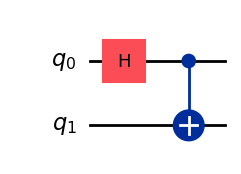

In [1]:
# Step 1 : 문제를 회로에 매핑
from qiskit import QuantumCircuit

# 1.1 2큐빗이 있는 회로 생성
qc = QuantumCircuit(2)

# 1.2 0번째 큐빗에 하다마르 게이트 생성
qc.h(0)
# 1.3 0번째 큐빗과 첫 번째 큐빗 사이에 CNOT 게이트 생성
qc.cx(0,1)

# 1.4 회로 draw
qc.draw(output='mpl')



In [ ]:
from qiskit.quantum_info import Pauli

# P 연산자 (Pauli) 생성 - 생성할 때, 변수 이름을 문자열로 전달함.
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')


observables = [ZZ, ZI, IZ, XX, XI, IX]

In [3]:
# step 2 : Observables 회로 최적화
# 현재는 그럴 필요가 없다.

In [3]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

#parameter : 
# [IN] 양자 회로 수 * 관측 가능한 항목의 수
job = estimator.run( [qc] * len(observables), observables )

job.result()

EstimatorResult(values=array([1.        , 0.05273438, 0.05273438, 1.        , 0.05078125,
       0.05078125, 1.        ]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0056579, 'sample_measure_time': 0.0004922, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 64728, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 32, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9972190856933594, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0056579, 'sample_measure_time': 

Text(0, 0.5, 'Expectation value')

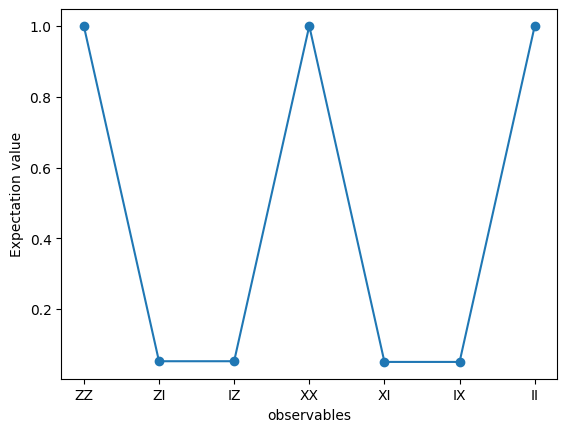

In [ ]:
# 4. 후처리 및 plotting
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('observables')
plt.ylabel('Expectation value')